# Linear Regression for Boston House Price Prediction

## Lets load the dataset and apply columns

In [13]:
# Linear Regression for Boston house prices
import numpy
import pandas as pd
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression

filename = '../input/boston-house-prices/housing.csv'
names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT', 'MEDV']
dataset = pd.read_csv(filename, delim_whitespace=True, names=names)

In [2]:
# SHAPE OF THE DATASET
print (dataset.shape)
# Describe the dataset
print (dataset.describe())

(506, 14)
             CRIM          ZN     ...           LSTAT        MEDV
count  506.000000  506.000000     ...      506.000000  506.000000
mean     3.613524   11.363636     ...       12.653063   22.532806
std      8.601545   23.322453     ...        7.141062    9.197104
min      0.006320    0.000000     ...        1.730000    5.000000
25%      0.082045    0.000000     ...        6.950000   17.025000
50%      0.256510    0.000000     ...       11.360000   21.200000
75%      3.677082   12.500000     ...       16.955000   25.000000
max     88.976200  100.000000     ...       37.970000   50.000000

[8 rows x 14 columns]


# Lets apply the linear regression model and check the score

In [3]:
array = dataset.values
X = array[:,0:13]
Y = array[:,13]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size,
random_state=seed)
model = LinearRegression()
model.fit(X_train, Y_train)
result = model.score(X_test, Y_test)
finalResult = result*100
print("The Accuracy Score  - {}". format(finalResult))

The Accuracy Score  - 66.63089606572566


# Lets apply K-Fold Cross Validation for Linear Regression

In [4]:
kfold = KFold(n_splits=5, random_state=7)
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("MAE: %.3f (%.3f) " % (results.mean(), results.std()))
print("The Actual result  - {}". format(results))

MAE: -37.132 (23.092) 
The Actual result  - [-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]


# Lets generate a sample dataset for one more linear regression dataset

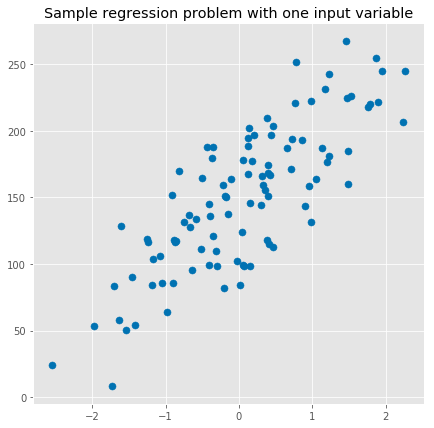

In [14]:
# synthetic dataset for classification (binary) 
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification, make_blobs, make_regression
plt.style.use('ggplot')
plt.style.use('seaborn-colorblind')
plt.figure(figsize=(7,7))
plt.title('Sample regression problem with one input variable')
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)
plt.scatter(X_R1, y_R1, marker= 'o', s=50)
plt.show()

# Lets implement the linear regression model

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'.format(linreg.coef_))
print('linear model intercept (b): {:.3f}'.format(linreg.intercept_))
print('R-squared score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'.format(linreg.score(X_test, y_test)))

linear model coeff (w): [ 45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


# Lets plot down the linear regression output

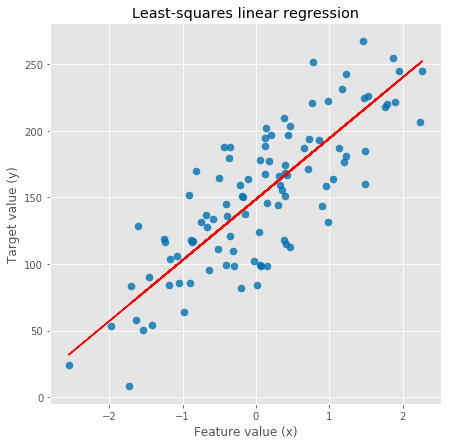

In [16]:
plt.figure(figsize=(7,7))
plt.scatter(X_R1, y_R1, marker= 'o', s=50, alpha=0.8)
plt.plot(X_R1, linreg.coef_ * X_R1 + linreg.intercept_, 'r-')
plt.title('Least-squares linear regression')
plt.xlabel('Feature value (x)')
plt.ylabel('Target value (y)')
plt.show()

# Lets consider one more dataset,  the crime dataset describing the violent crimes commited in a specific areas.

In [8]:
df = pd.read_csv('../input/additionalcrimedataset/crimedata.csv', sep=',', na_values='?', header=0)
requiredColumns = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
df = df.iloc[:,requiredColumns].dropna()

X = df.iloc[:,range(0,88)]
y = df['ViolentCrimesPerPop']

# lets apply the linear regression model

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
linearReg = LinearRegression().fit(X_train,y_train)

#print ("Linear Model Intercept - {}".format(linearReg.intercept_))
#print ("Linear Model Coefficient - \n {}".format(linearReg.coef_))
print ("Training Score - {:.3f}".format(linearReg.score(X_train,y_train)))
print ("Testing Score - {:.3f}".format(linearReg.score(X_test,y_test)))

Training Score - 0.673
Testing Score - 0.496


# Lets try to apply rigde regression on the same dataset and check whether we can get some better accuracy

In [18]:
from sklearn.linear_model import Ridge
import numpy as np
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)
ridgeReg = Ridge(alpha=20.0).fit(X_train,y_train)

print ("Training Score - {:.3f}".format(ridgeReg.score(X_train,y_train)))
print ("Testing Score - {:.3f}".format(ridgeReg.score(X_test,y_test)))
print('Number of non-zero features: {}'.format(np.sum(ridgeReg.coef_ != 0)))

Training Score - 0.671
Testing Score - 0.494
Number of non-zero features: 88


# Now lets apply Normalization to Ridge regression

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

ridgeReg = Ridge(alpha=20.0).fit(X_train_scale,y_train)

print ("Training Score - {:.3f}".format(ridgeReg.score(X_train_scale,y_train)))
print ("Testing Score - {:.3f}".format(ridgeReg.score(X_test_scale,y_test)))
print('Number of non-zero features: {}'.format(np.sum(ridgeReg.coef_ != 0)))


Training Score - 0.615
Testing Score - 0.599
Number of non-zero features: 88


# Lets try ridge regression with normalization for different values of alpha. But we see that as the alpha increases the accuracy decreases 

In [20]:
for newAlpha in [0, 1, 10, 20, 50, 100, 1000]:
    linridge = Ridge(alpha = newAlpha).fit(X_train_scale, y_train)
    r2_train = linridge.score(X_train_scale, y_train)
    r2_test = linridge.score(X_test_scale, y_test)
    num_coeff_bigger = np.sum(abs(linridge.coef_) > 1.0)
    print('Alpha = {:.2f}\nnum abs(coeff) > 1.0: {}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(newAlpha, num_coeff_bigger, r2_train, r2_test))

Alpha = 0.00
num abs(coeff) > 1.0: 88, r-squared training: 0.67, r-squared test: 0.49

Alpha = 1.00
num abs(coeff) > 1.0: 87, r-squared training: 0.66, r-squared test: 0.56

Alpha = 10.00
num abs(coeff) > 1.0: 87, r-squared training: 0.63, r-squared test: 0.59

Alpha = 20.00
num abs(coeff) > 1.0: 88, r-squared training: 0.61, r-squared test: 0.60

Alpha = 50.00
num abs(coeff) > 1.0: 86, r-squared training: 0.58, r-squared test: 0.58

Alpha = 100.00
num abs(coeff) > 1.0: 87, r-squared training: 0.55, r-squared test: 0.55

Alpha = 1000.00
num abs(coeff) > 1.0: 84, r-squared training: 0.31, r-squared test: 0.30



# Now lets apply Lasso regression and check how many features get reduced

In [21]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

LassoReg = Lasso(alpha=2.0, max_iter = 10000).fit(X_train_scale,y_train)

print ("Training Score - {:.3f}".format(LassoReg.score(X_train_scale,y_train)))
print ("Testing Score - {:.3f}".format(LassoReg.score(X_test_scale,y_test)))
print('Number of non-zero features: {}'.format(np.sum(LassoReg.coef_ != 0)))

Training Score - 0.631
Testing Score - 0.624
Number of non-zero features: 20


# By changing the  alpha parameter , we can check that as the alpha increases the accuracy decreases

In [22]:
print('Lasso regression: effect of alpha regularization\n\
parameter on number of features kept in final model\n')

for alpha in [0.5, 1, 2, 3, 4, 5, 10, 20, 50]:
    linlasso = Lasso(alpha, max_iter = 10000).fit(X_train_scale, y_train)
    r2_train = linlasso.score(X_train_scale, y_train)
    r2_test = linlasso.score(X_test_scale, y_test)
    
    print('Alpha = {:.2f}\nFeatures kept: {}, r-squared training: {:.2f}, \
r-squared test: {:.2f}\n'.format(alpha, np.sum(linlasso.coef_ != 0), r2_train, r2_test))

Lasso regression: effect of alpha regularization
parameter on number of features kept in final model

Alpha = 0.50
Features kept: 35, r-squared training: 0.65, r-squared test: 0.58

Alpha = 1.00
Features kept: 25, r-squared training: 0.64, r-squared test: 0.60

Alpha = 2.00
Features kept: 20, r-squared training: 0.63, r-squared test: 0.62

Alpha = 3.00
Features kept: 17, r-squared training: 0.62, r-squared test: 0.63

Alpha = 4.00
Features kept: 14, r-squared training: 0.61, r-squared test: 0.62

Alpha = 5.00
Features kept: 12, r-squared training: 0.60, r-squared test: 0.61

Alpha = 10.00
Features kept: 6, r-squared training: 0.57, r-squared test: 0.58

Alpha = 20.00
Features kept: 2, r-squared training: 0.51, r-squared test: 0.50

Alpha = 50.00
Features kept: 1, r-squared training: 0.31, r-squared test: 0.30

